# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/customer-bookings/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

**PROCESSING SALES CHANNEL & TRIP TYPE**

In [8]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
dummy1 = pd.get_dummies(df[['sales_channel','trip_type']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,False,False,True
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,False,False,True
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,False,False,True
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,False,False,True
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,False,False,True


In [12]:
def binary_map(x):
    return x.map({True:1,False:0})

In [13]:
df.sales_channel_Mobile =  binary_map(df.sales_channel_Mobile)

In [14]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,False,True
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,False,True
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,False,True
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,False,True
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,False,True


In [15]:
df.trip_type_OneWay =  binary_map(df.trip_type_OneWay)
df.trip_type_RoundTrip =  binary_map(df.trip_type_RoundTrip)

In [16]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1


In [17]:
df.sales_channel_Mobile.unique()

array([0, 1])

In [18]:
df.drop(['sales_channel','trip_type'],inplace = True,axis=1)

In [19]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1


**PROCESSING NUM OF PASSENGERS**

In [20]:
df.num_passengers.unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8])

In [21]:
def group_size(x):
    if x in [1,2,3]:
        size = 'small'
        
    elif x in [4,5,6]:
        size = 'medium'
    else:
        size = 'large'
    return size

In [22]:
df['group'] = df.num_passengers.apply(lambda x:group_size(x))

In [23]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,small
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,small
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,small
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,small
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,small


In [24]:
df.group.unique()

array(['small', 'medium', 'large'], dtype=object)

In [25]:
dummy2 = pd.get_dummies(df['group'], drop_first=True,prefix = 'group')

# Adding the results to the master dataframe
df = pd.concat([df, dummy2], axis=1)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   route                  50000 non-null  object 
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  sales_channel_Mobile   50000 non-null  int64  
 13  trip_type_OneWay       50000 non-null  int64  
 14  trip_type_RoundTrip    50000 non-null  int64  
 15  gr

In [27]:
df.group_medium.unique()

array([False,  True])

In [28]:
df.group_medium =  binary_map(df.group_medium)
df.group_small =  binary_map(df.group_small)
df.drop(['num_passengers','group'],inplace = True,axis=1)

In [29]:
df.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group_medium,group_small
0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1
1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1
2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,1
3,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1
4,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,1


**PROCESSING LENGTH OF STAY**

In [30]:
df.length_of_stay.describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: length_of_stay, dtype: float64

In [31]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x786d031910c0>,
 'caps': [<matplotlib.lines.Line2D at 0x786d03191600>,
 'boxes': [<matplotlib.lines.Line2D at 0x786d03190e20>],
 'medians': [<matplotlib.lines.Line2D at 0x786d03191b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x786d03191de0>],
 'means': []}

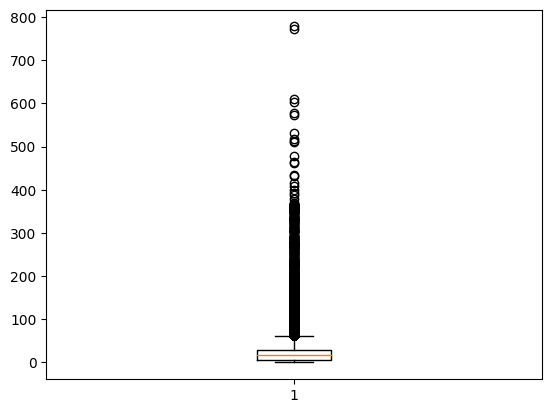

In [32]:
plt.boxplot(df.length_of_stay)

In [33]:
df.length_of_stay.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
90%         53.00000
95%         84.00000
99%        168.00000
max        778.00000
Name: length_of_stay, dtype: float64

In [34]:
df[df.length_of_stay >= 168].booking_complete.value_counts()

booking_complete
0    427
1     77
Name: count, dtype: int64

In [35]:
df.length_of_stay = pd.qcut(df.length_of_stay,q = [0,0.25,0.75,0.95,0.99,1],labels = ['los>5','los<28','los<84','los<168','los>168'])

In [36]:
df.length_of_stay.describe()

count      50000
unique         5
top       los<28
freq       20752
Name: length_of_stay, dtype: object

In [37]:
df.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group_medium,group_small
0,262,los<28,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1
1,112,los<28,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1
2,243,los<28,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,1
3,96,los<84,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1
4,68,los<28,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,1


In [38]:
dummy3 = pd.get_dummies(df['length_of_stay'], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy3], axis=1)

In [39]:
df.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group_medium,group_small,los<28,los<84,los<168,los>168
0,262,los<28,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1,True,False,False,False
1,112,los<28,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1,True,False,False,False
2,243,los<28,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,1,True,False,False,False
3,96,los<84,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1,False,True,False,False
4,68,los<28,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,1,True,False,False,False


In [40]:
df['los<28'] =  binary_map(df['los<28'])
df['los<84'] =  binary_map(df['los<84'])
df['los<168'] =  binary_map(df['los<168'])
df['los>168'] =  binary_map(df['los>168'])

In [41]:
df.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group_medium,group_small,los<28,los<84,los<168,los>168
0,262,los<28,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1,1,0,0,0
1,112,los<28,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1,1,0,0,0
2,243,los<28,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,1,1,0,0,0
3,96,los<84,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1,0,1,0,0
4,68,los<28,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,1,1,0,0,0


In [42]:
df.drop(['length_of_stay'],axis = 1, inplace =True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   purchase_lead          50000 non-null  int64  
 1   flight_hour            50000 non-null  int64  
 2   flight_day             50000 non-null  int64  
 3   route                  50000 non-null  object 
 4   booking_origin         50000 non-null  object 
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
 10  sales_channel_Mobile   50000 non-null  int64  
 11  trip_type_OneWay       50000 non-null  int64  
 12  trip_type_RoundTrip    50000 non-null  int64  
 13  group_medium           50000 non-null  int64  
 14  group_small            50000 non-null  int64  
 15  lo

**PROCESSING PURCHASE LEAD**

In [44]:
df.purchase_lead.describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [45]:
df.purchase_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
90%        224.000000
95%        287.000000
99%        390.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [46]:
df.purchase_lead = pd.qcut(df.purchase_lead,q = [0,0.25,0.5,0.75,0.9,0.99,1],labels = ['very short','short','medium','long','very long','too long'])

In [47]:
df.head()

,purchase_lead,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,group_medium,group_small,los<28,los<84,los<168,los>168
0,very long,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1,1,0,0,0
1,medium,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1,1,0,0,0
2,very long,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,1,1,0,0,0
3,medium,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1,0,1,0,0
4,medium,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,1,1,0,0,0


In [48]:
dummy4 = pd.get_dummies(df['purchase_lead'], drop_first=True,prefix = 'pur_lead')

# Adding the results to the master dataframe
df = pd.concat([df, dummy4], axis=1)

In [49]:
df.head()

,purchase_lead,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,group_small,los<28,los<84,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long
0,very long,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,...,1,1,0,0,0,False,False,False,True,False
1,medium,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,...,1,1,0,0,0,False,True,False,False,False
2,very long,17,3,AKLDEL,India,1,1,0,5.52,0,...,1,1,0,0,0,False,False,False,True,False
3,medium,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,...,1,0,1,0,0,False,True,False,False,False
4,medium,15,3,AKLDEL,India,1,0,1,5.52,0,...,1,1,0,0,0,False,True,False,False,False


In [50]:
df.pur_lead_short = binary_map(df.pur_lead_short)
df.pur_lead_medium = binary_map(df.pur_lead_medium)
df.pur_lead_long = binary_map(df.pur_lead_long)
df['pur_lead_very long'] = binary_map(df['pur_lead_very long'])
df['pur_lead_too long'] = binary_map(df['pur_lead_too long'])


In [51]:
df.drop(['purchase_lead'],axis = 1, inplace =True)

In [52]:
df.head()

,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,group_small,los<28,los<84,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long
0,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,...,1,1,0,0,0,0,0,0,1,0
1,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,...,1,1,0,0,0,0,1,0,0,0
2,17,3,AKLDEL,India,1,1,0,5.52,0,0,...,1,1,0,0,0,0,0,0,1,0
3,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,...,1,0,1,0,0,0,1,0,0,0
4,15,3,AKLDEL,India,1,0,1,5.52,0,0,...,1,1,0,0,0,0,1,0,0,0


**PROCESSING FLIGHT HOUR**

In [53]:
df.flight_hour.unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21])

In [54]:
def flight_hour(x):
    if x in range(7):
        hour = 'q1'
        
    elif x in range(7,13):
        hour = 'q2'
    elif x in range(13,19):
        hour = 'q3'
    else:
        hour = 'q4'
    return hour

In [55]:
df.flight_hour = df.flight_hour.apply(lambda x:flight_hour(x))

In [56]:
df.head()

,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,group_small,los<28,los<84,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long
0,q2,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,...,1,1,0,0,0,0,0,0,1,0
1,q1,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,...,1,1,0,0,0,0,1,0,0,0
2,q3,3,AKLDEL,India,1,1,0,5.52,0,0,...,1,1,0,0,0,0,0,0,1,0
3,q1,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,...,1,0,1,0,0,0,1,0,0,0
4,q3,3,AKLDEL,India,1,0,1,5.52,0,0,...,1,1,0,0,0,0,1,0,0,0


In [57]:
dummy5 = pd.get_dummies(df['flight_hour'], drop_first=True,prefix = 'day')

# Adding the results to the master dataframe
df = pd.concat([df, dummy5], axis=1)

In [58]:
df.head()

,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4
0,q2,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,...,0,0,0,0,0,1,0,True,False,False
1,q1,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,...,0,0,0,1,0,0,0,False,False,False
2,q3,3,AKLDEL,India,1,1,0,5.52,0,0,...,0,0,0,0,0,1,0,False,True,False
3,q1,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,...,0,0,0,1,0,0,0,False,False,False
4,q3,3,AKLDEL,India,1,0,1,5.52,0,0,...,0,0,0,1,0,0,0,False,True,False


In [59]:
df.day_q2 = binary_map(df.day_q2)
df.day_q3 = binary_map(df.day_q3)
df.day_q4 = binary_map(df.day_q4)

In [60]:
df.drop(['flight_hour'],axis=1,inplace=True)

In [61]:
df.head()

,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,...,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4
0,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,AKLDEL,India,1,1,0,5.52,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,AKLDEL,India,1,0,1,5.52,0,0,0,...,0,0,0,1,0,0,0,0,1,0


**PROCESSING FLIGHT DURATION**

In [62]:
df.flight_duration.unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [63]:
df.flight_duration.describe()

count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64

In [64]:
df.flight_duration = pd.cut(df.flight_duration,bins = 3,labels = ['short','medium','long'])


In [65]:
df.head()

,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,...,los<168,los>168,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4
0,6,AKLDEL,New Zealand,1,0,0,short,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,6,AKLDEL,New Zealand,0,0,0,short,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,AKLDEL,India,1,1,0,short,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,6,AKLDEL,New Zealand,0,0,1,short,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,AKLDEL,India,1,0,1,short,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [66]:
df.flight_duration.unique()

['short', 'medium', 'long']
Categories (3, object): ['short' < 'medium' < 'long']

In [67]:
dummy6 = pd.get_dummies(df['flight_duration'], drop_first=True,prefix = 'flight')

# Adding the results to the master dataframe
df = pd.concat([df, dummy6], axis=1)

In [68]:
df.head()

,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,...,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4,flight_medium,flight_long
0,6,AKLDEL,New Zealand,1,0,0,short,0,0,0,...,0,0,0,1,0,1,0,0,False,False
1,6,AKLDEL,New Zealand,0,0,0,short,0,0,0,...,0,1,0,0,0,0,0,0,False,False
2,3,AKLDEL,India,1,1,0,short,0,0,0,...,0,0,0,1,0,0,1,0,False,False
3,6,AKLDEL,New Zealand,0,0,1,short,0,0,0,...,0,1,0,0,0,0,0,0,False,False
4,3,AKLDEL,India,1,0,1,short,0,0,0,...,0,1,0,0,0,0,1,0,False,False


In [69]:
df.flight_medium = binary_map(df.flight_medium)
df.flight_long = binary_map(df.flight_long)

In [70]:
df.drop(['flight_duration'],axis=1,inplace=True)

In [71]:
df.head()

,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,...,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4,flight_medium,flight_long
0,6,AKLDEL,New Zealand,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,6,AKLDEL,New Zealand,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,AKLDEL,India,1,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,6,AKLDEL,New Zealand,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,3,AKLDEL,India,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


**CHECKING REMAINING CATEGORICAL COLUMNS**

In [72]:
df.route.nunique()  #very high cardinality

799

In [73]:
df.booking_origin.nunique() #very high cardinality

104

In [74]:
df.drop(['route','booking_origin'],axis = 1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   flight_day             50000 non-null  int64
 1   wants_extra_baggage    50000 non-null  int64
 2   wants_preferred_seat   50000 non-null  int64
 3   wants_in_flight_meals  50000 non-null  int64
 4   booking_complete       50000 non-null  int64
 5   sales_channel_Mobile   50000 non-null  int64
 6   trip_type_OneWay       50000 non-null  int64
 7   trip_type_RoundTrip    50000 non-null  int64
 8   group_medium           50000 non-null  int64
 9   group_small            50000 non-null  int64
 10  los<28                 50000 non-null  int64
 11  los<84                 50000 non-null  int64
 12  los<168                50000 non-null  int64
 13  los>168                50000 non-null  int64
 14  pur_lead_short         50000 non-null  int64
 15  pur_lead_medium        50000 non-nul

**CHECKING CORRELATIONS**

In [76]:
import seaborn as sns
%matplotlib inline

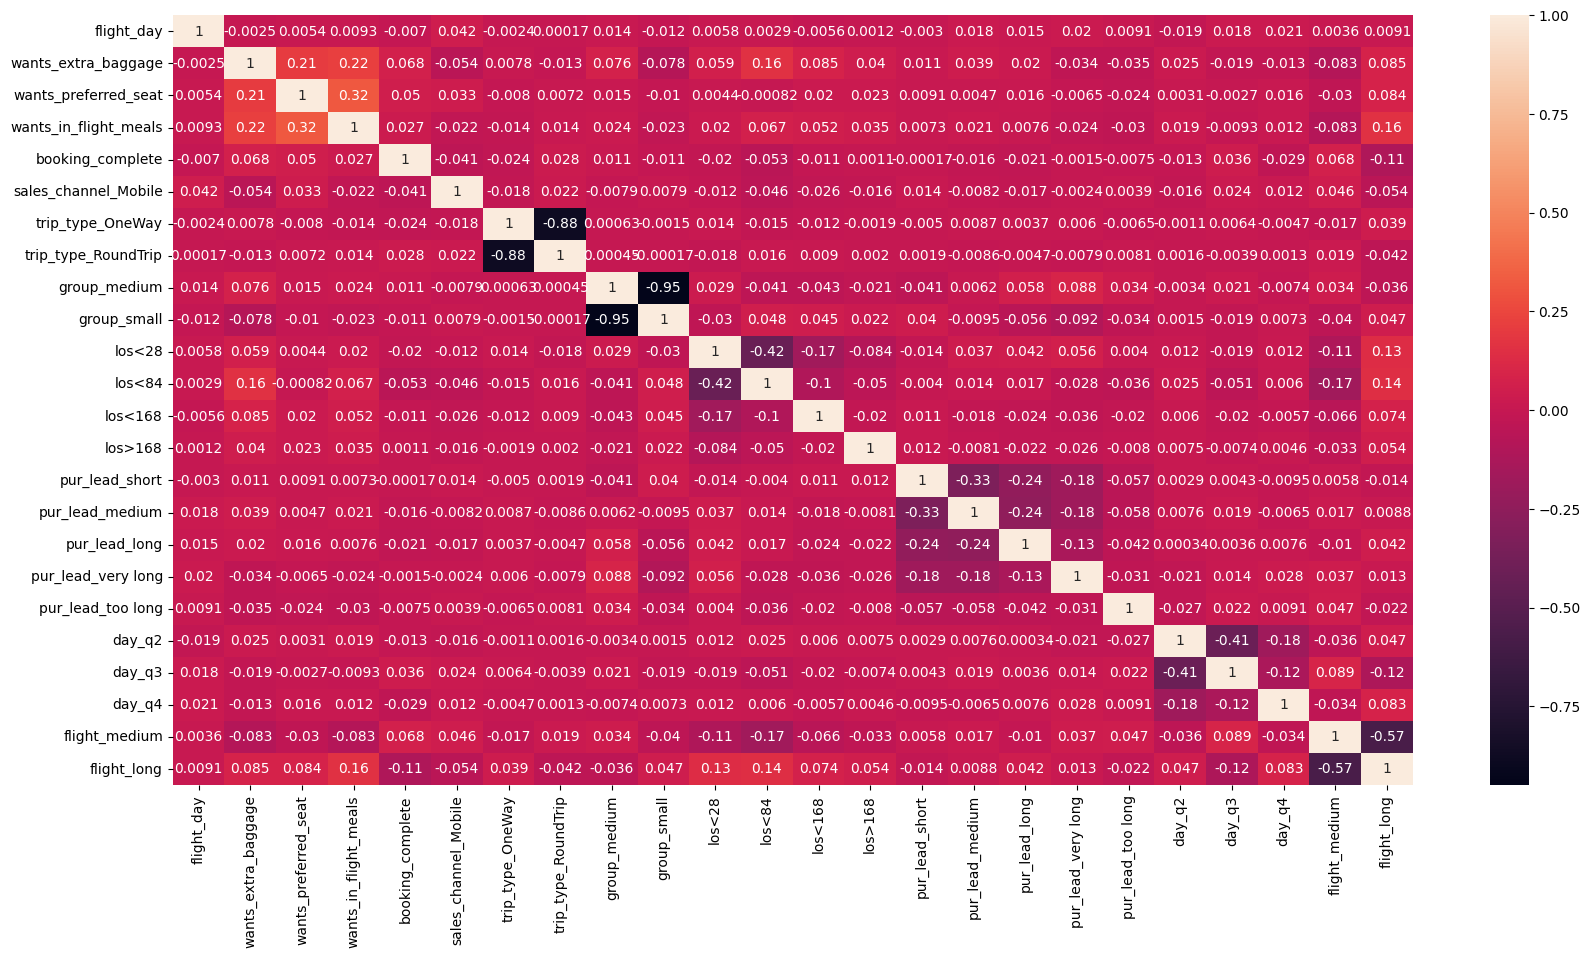

In [77]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [78]:
df.drop(['trip_type_OneWay','group_medium'],axis =1,inplace=True) #dropping them because of high correlation

In [79]:
df.head()

,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,sales_channel_Mobile,trip_type_RoundTrip,group_small,los<28,los<84,...,pur_lead_short,pur_lead_medium,pur_lead_long,pur_lead_very long,pur_lead_too long,day_q2,day_q3,day_q4,flight_medium,flight_long
0,6,1,0,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
1,6,0,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,6,0,0,1,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,3,1,0,1,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0


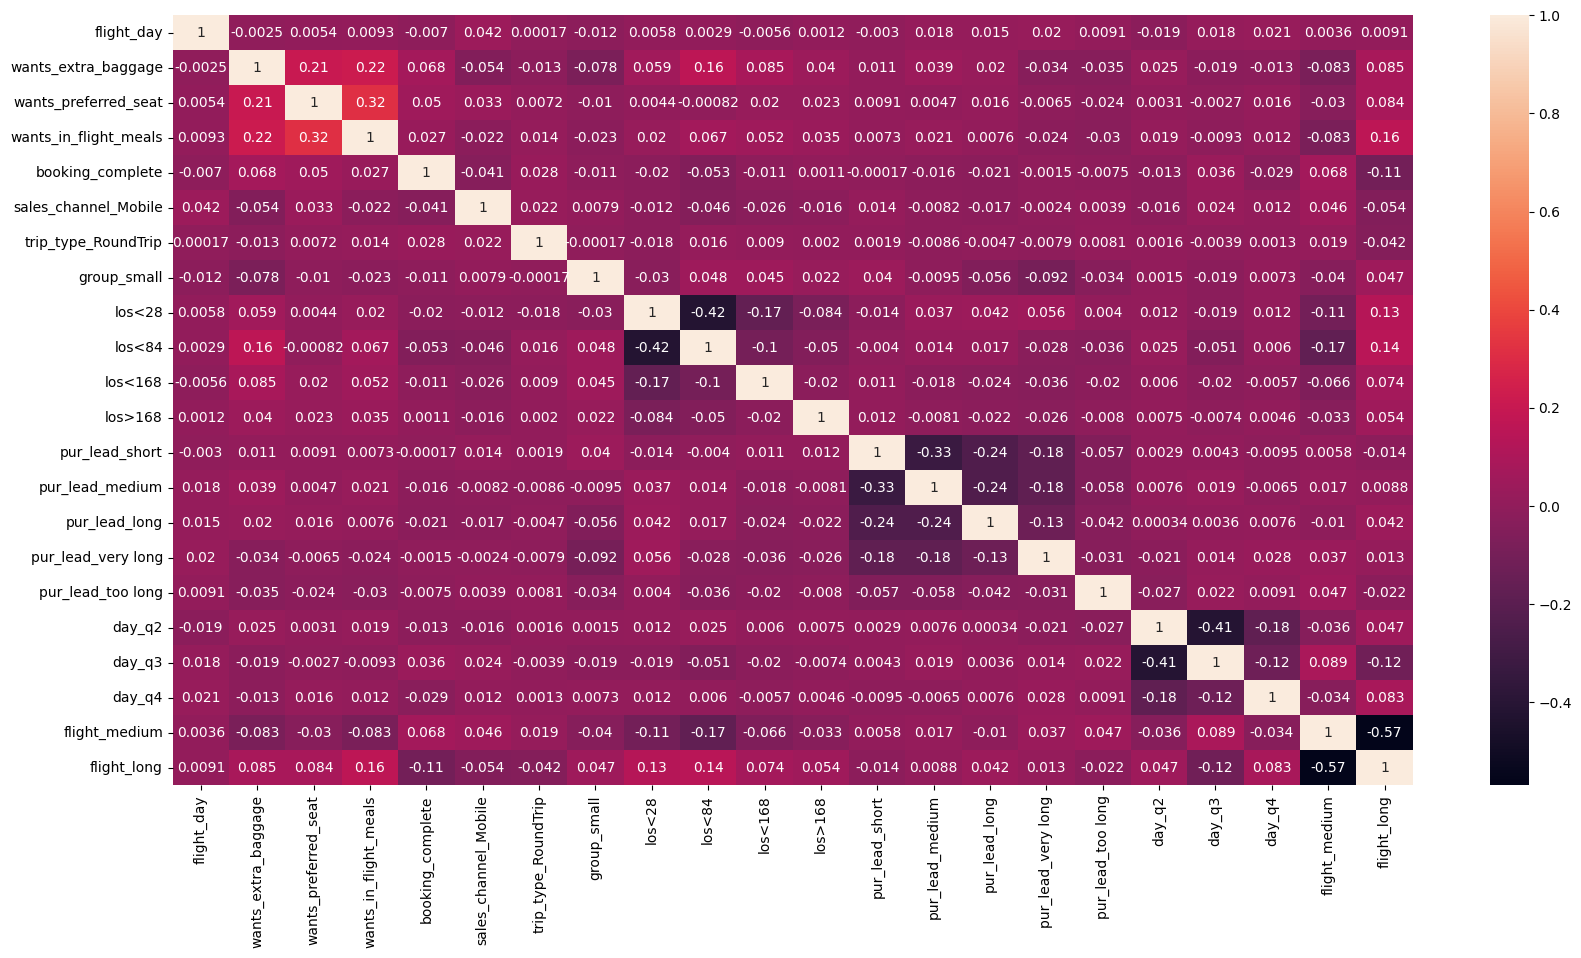

In [80]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

**SAVING FINAL DF**

In [81]:
df.to_csv('processed_df.csv')

**SPLITTING THE DATASET**

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
y = df.pop('booking_complete')
X = df

In [85]:
booking_rate = (sum(y)/len(df))*100
booking_rate   # Class Imbalance present in target variable so, will go with smote

14.956

In [97]:
X_train_before_sm, X_test, y_train_before_sm, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=100)

In [99]:
#!pip install imblearn

In [101]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_before_sm == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_before_sm == 0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_resample(X_train_before_sm, y_train_before_sm.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 6722
Before OverSampling, counts of label '0': 38278 



/tmp/ipykernel_237/2509450495.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, y_train = sm.fit_resample(X_train_before_sm, y_train_before_sm.ravel())


After OverSampling, the shape of train_X: (76556, 21)
After OverSampling, the shape of train_y: (76556,) 

After OverSampling, counts of label '1': 38278
After OverSampling, counts of label '0': 38278


**MODEL TRAINING & EVALUATION**

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,classification_report,confusion_matrix,roc_auc_score,f1_score,accuracy_score,ConfusionMatrixDisplay

In [103]:
# Initializing Classifiers
classifiers = {'LogReg':LogisticRegression(),
              'SVM':SVC(),
              'KNN':KNeighborsClassifier(),
              'DT':DecisionTreeClassifier(),
              'RF':RandomForestClassifier(),
              'GB':GradientBoostingClassifier()
              }

In [115]:
# Training & Evaluating Models
results = {}
for name,clf in classifiers.items():
    scores =cross_val_score(clf,X_train,y_train,cv=5,scoring = 'roc_auc')
    results[name]=scores.mean()

In [117]:
for name,score in results.items():
    print(f"{name}:{score:.4f}")

LogReg:0.6913
SVM:0.6990
KNN:0.7599
DT:0.8012
RF:0.8215
GB:0.6998


In [120]:
# Select the best model
best_model_name = max(results,key =results.get)
best_model = classifiers[best_model_name]

In [119]:
best_model

RandomForestClassifier()

In [121]:
# Train the best model
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
# Predicting on Test set with the best model
y_test_pred = best_model.predict(X_test)

In [123]:
# Evaluating the best model
auc_best = roc_auc_score(y_test,y_test_pred)
print('\nBest Model: ',best_model_name)
print('\nAccuracy with best model: ',auc_best)
print('\nClassification Report: ',classification_report(y_test,y_test_pred))
print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_test_pred))


Best Model:  RF

Accuracy with best model:  0.5472905415176857

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.67      0.76      4244
           1       0.19      0.42      0.26       756

    accuracy                           0.63      5000
   macro avg       0.53      0.55      0.51      5000
weighted avg       0.76      0.63      0.68      5000


Confusion Matrix:
 [[2849 1395]
 [ 436  320]]


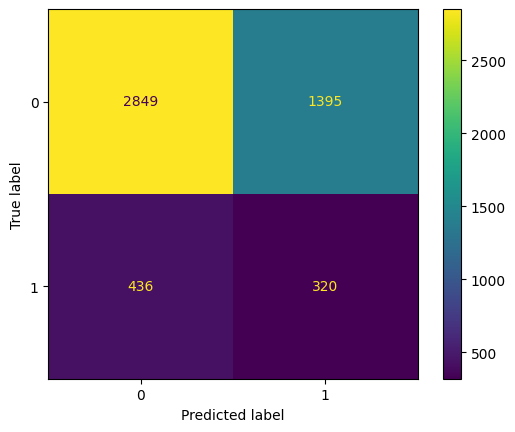

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred))
disp.plot()


**IMPROVING RF MODEL WITH HPT**

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [127]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [158]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [159]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
CPU times: user 22.2 s, sys: 21.4 s, total: 43.5 s
Wall time: 5min 26s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=1)

In [160]:
grid_search.best_score_

0.7884148964246603

In [161]:
rf_best = grid_search.best_estimator_


In [162]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [164]:
y_test_pred_rf =rf_best.predict(X_test)

In [165]:
# Evaluating the best model
auc_best = roc_auc_score(y_test,y_test_pred_rf)

print('\nAUC:  ',auc_best)
print('\nClassification Report: ',classification_report(y_test,y_test_pred_rf))
print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_test_pred_rf))


AUC:   0.5577628422821637

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.66      0.75      4244
           1       0.19      0.45      0.27       756

    accuracy                           0.63      5000
   macro avg       0.53      0.56      0.51      5000
weighted avg       0.77      0.63      0.68      5000


Confusion Matrix:
 [[2820 1424]
 [ 415  341]]


In [166]:
rf_best.oob_score

False

In [167]:
rf_best.feature_importances_

array([0.24968686, 0.04971172, 0.04049195, 0.04948481, 0.07621171,
       0.00597058, 0.02126591, 0.04768488, 0.05581349, 0.02067413,
       0.00710713, 0.03733256, 0.03213166, 0.03205679, 0.02439944,
       0.00971325, 0.0363187 , 0.03564552, 0.02671007, 0.03321579,
       0.10837307])

In [168]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [169]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,flight_day,0.249687
20,flight_long,0.108373
4,sales_channel_Mobile,0.076212
8,los<84,0.055813
1,wants_extra_baggage,0.049712
3,wants_in_flight_meals,0.049485
7,los<28,0.047685
2,wants_preferred_seat,0.040492
11,pur_lead_short,0.037333
16,day_q2,0.036319


In [170]:
# Using Permutation Importance for finding feature importance
import eli5
from eli5.sklearn import PermutationImportance

2024-05-09 08:41:04.240375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 08:41:04.240527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 08:41:04.415344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [171]:
perm = PermutationImportance(rf_best, random_state=1,scoring = 'roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0316 ± 0.0059,los<84
0.0221 ± 0.0045,wants_extra_baggage
0.0218 ± 0.0083,flight_long
0.0176 ± 0.0049,sales_channel_Mobile
0.0133 ± 0.0143,los<28
0.0100 ± 0.0035,pur_lead_very long
0.0069 ± 0.0119,wants_in_flight_meals
0.0063 ± 0.0135,flight_day
0.0055 ± 0.0042,day_q2
0.0054 ± 0.0045,day_q4
